< 5. [Données spatiales](05-donnees-spatiales.ipynb) | [Contents](index.ipynb) | 7. [Modèles statistiques](07-modeles-statistiques.ipynb) >

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as pylab
from math import sqrt
import scipy.stats
#matplotlib inline

def stats(x):
    print('min/max: {0} {1}'.format(min(x), max(x)))
    print('moy +- ecart-type: {0} {1}'.format(np.mean(x), np.std(x)))# ddof=1
    print('skewness / kurtosis: {0} {1}'.format(scipy.stats.skew(x), scipy.stats.kurtosis(x)))

# Statistiques descriptives

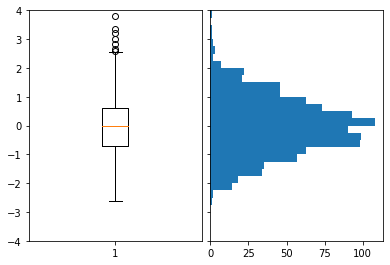

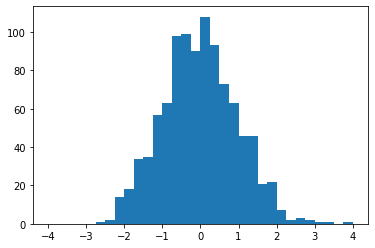

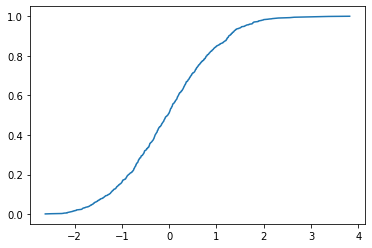

In [2]:
from matplotlib.ticker import NullFormatter

# the random data
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.4 # 0.65
bottom, height = 0.1, 0.8 # 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.4, height]

# start with a rectangular Figure
plt.figure()

axScatter = plt.axes(rect_scatter)
axHisty = plt.axes(rect_histy)

# no labels
axHisty.yaxis.set_major_formatter(nullfmt)
axScatter.xaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.boxplot(y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max(np.fabs(y)) #np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

#axScatter.set_xlim( (-lim, lim) )
axScatter.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('normal-boxplot.pdf')

# cumulative function
plt.figure()
plt.hist(y, bins=bins)
#plt.savefig('normal-hist.pdf')

plt.figure()
plt.plot(sorted(y), np.arange(1,len(y)+1)/len(y))
#plt.savefig('normal-cdf.pdf')

min/max: 19.5052248 147.3157908
moy +- ecart-type: 95.02027787226386 22.886233067266073
skewness / kurtosis: -0.8628733119651851 0.24283993707816043


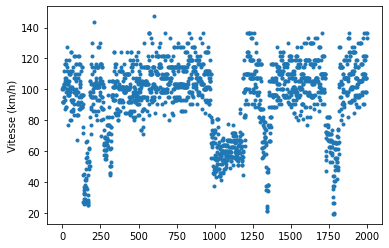

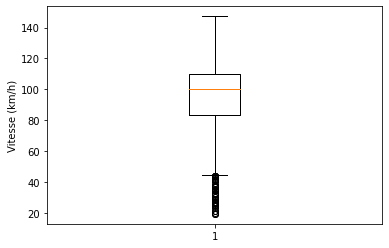

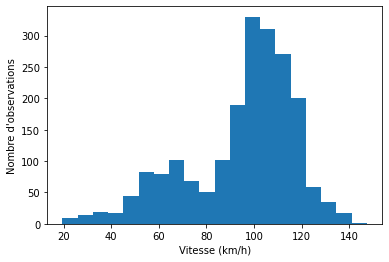

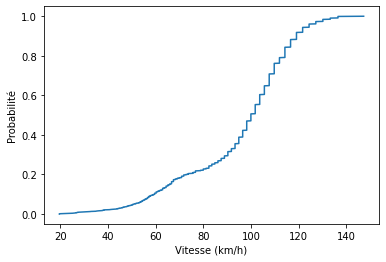

In [3]:
vitesses = 3.6*np.loadtxt('donnees/vitesses-bt-b-a.txt') # en km/h
plt.figure()
plt.plot(vitesses,'.')
plt.ylabel('Vitesse (km/h)')

plt.figure()
plt.boxplot(vitesses)
plt.ylabel('Vitesse (km/h)')

plt.figure()
plt.hist(vitesses,20)
plt.xlabel('Vitesse (km/h)')
plt.ylabel('Nombre d\'observations')

plt.figure()
plt.plot(sorted(vitesses), np.arange(1,len(vitesses)+1)/len(vitesses))
plt.xlabel('Vitesse (km/h)')
plt.ylabel('Probabilité')

stats(vitesses)

(0.0, 110.0)

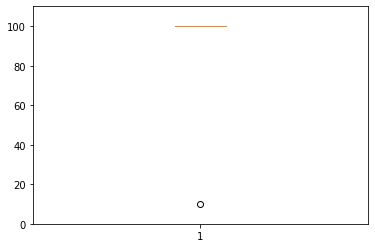

In [4]:
# distribution avec une valeur aberrante (ou atypique)
x = [100]*100
x[99]=10

plt.boxplot(x)
plt.ylim((0,110))

# Intervalles de confiance

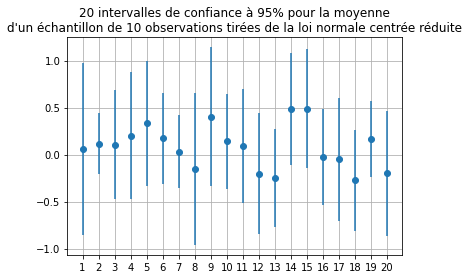

In [5]:
# observation que les intervalles de confiance contiennent la vraie moyenne que dans un certains pourcentage des cas
normal = scipy.stats.norm()
n = 10
plt.figure()
means = []
meanStd = []
for i in range(20):
    x=normal.rvs(n)
    means.append(x.mean())
    meanStd.append(1.96*x.std()/sqrt(n))
plt.errorbar(list(range(1,len(means)+1)),means, yerr=meanStd, fmt='o')
plt.title('20 intervalles de confiance à 95% pour la moyenne\n'
          +'d\'un échantillon de 10 observations tirées de la loi normale centrée réduite')
plt.xticks(list(range(1,len(means)+1)))
plt.grid()
plt.show()

# Tests statistiques

## Test des moyennes de deux populations

Statistique du test Z0 -1.2013575453078844 et P(Z>|Z0|) 0.11480626854092857)


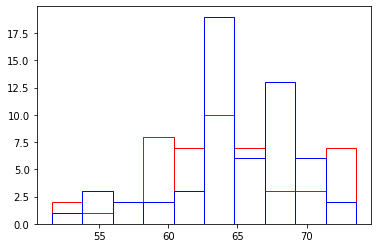

In [6]:
normal = scipy.stats.norm(65.3, 5.0)
vitesses1 = normal.rvs(50)
vitesses2 = normal.rvs(60)
n, bins, _ = plt.hist(vitesses1, fill = False, edgecolor = 'r')
plt.hist(vitesses2, bins = bins, fill = False, edgecolor = 'b')
Z0 = (vitesses1.mean()-vitesses2.mean())/sqrt(vitesses1.var()/len(vitesses1)+vitesses2.var()/len(vitesses2))
print('Statistique du test Z0 {} et P(Z>|Z0|) {})'.format(Z0, 1-scipy.stats.norm.cdf(abs(Z0))))

## Test du Chi2

    echantillon   theorique
0           9.0    2.526057
1          14.0    3.599949
2          19.0    7.701474
3          17.0   15.247668
4          45.0   27.937410
5          82.0   47.372146
6          80.0   74.338715
7         101.0  107.960000
8          69.0  145.099918
9          50.0  180.479729
10        102.0  207.752871
11        189.0  221.321305
12        330.0  218.201184
13        310.0  199.089634
14        270.0  168.111609
15        201.0  131.372354
16         59.0   95.009506
17         35.0   63.589644
18         17.0   39.387761
19          2.0   44.901064
590.7625578705897 0.0


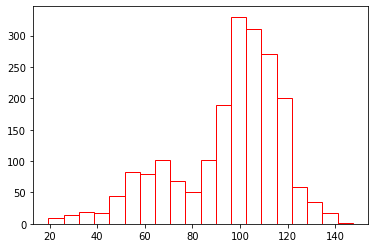

In [7]:
from pandas import DataFrame

nobservations, bins, _ = plt.hist(vitesses, bins = 20, fill = False, edgecolor = 'r')
normal = scipy.stats.norm(vitesses.mean(), vitesses.std())
probabilites = np.array([normal.cdf(x) for x in bins])
refNobservations = probabilites[1:]-probabilites[0:-1]
# ajouter les proba manquante avant le premier intervalle et apres le dernier intervalle
refNobservations[0] += probabilites[0]
refNobservations[-1] += 1-probabilites[-1]
refNobservations = refNobservations*len(vitesses)
print(DataFrame({'echantillon': nobservations, 'theorique': refNobservations}))
# regrouper les classes

# calculer la statistique du test
X2=0
for n,r in zip(nobservations, refNobservations):
    X2 += (n-r)**2/r
df = len(nobservations-1-2)
print(X2, 1-scipy.stats.distributions.chi2.cdf(X2,df))

< 5. [Données spatiales](05-donnees-spatiales.ipynb) | [Contents](index.ipynb) | 7. [Modèles statistiques](07-modeles-statistiques.ipynb) >